# Data Analysis for Litter Index and Historic Streets

- **Research Question:** What is the relationship between historic streets and the litter index in Philadelphia?

- **Hypothesis:** An area's litter index is likely lower if the location is historic.

- In this notebook, we will analyze the relationship between Philadelphia's historic streets and litter index.

## Set up

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter('ignore')

## Opening Litter Index and Cleaning Up Data

In [2]:
litter_index = pd.read_csv('../data/litter_index.csv')
litter_index

,OBJECTID,SEG_ID,HUNDRED_BLOCK_SCORE,LR_HUNDRED_BLOCK,YEAR,STREET_CLASS,STREET_CLASS_NAME,SCORE_COLOR,Shape__Length
0,1,521289,2.000000,1900 INGERSOLL ST,2018,5,Local,YELLOW,353.430892
1,2,521255,2.000000,1800 MASTER ST,2018,4,Collector,YELLOW,449.994425
2,3,420128,1.333333,1800 W STILES ST,2018,5,Local,GREEN,137.701612
3,4,420127,2.000000,1200 N 18TH ST,2018,4,Collector,YELLOW,142.859613
4,5,421610,2.000000,1200 N 20TH ST,2018,4,Collector,YELLOW,183.767439
...,...,...,...,...,...,...,...,...,...
79598,79599,600718,1.333333,0 LEVERINGTON AVE,2017,5,Local,GREEN,115.132244
79599,79600,543785,0.000000,1700 N DELAWARE AVE,2017,3,Minor Arterial,GREY,195.655423
79600,79601,1080636,1.333333,12600 NANTON DR,2017,4,Collector,GREEN,140.685545
79601,79602,880684,1.333333,4800 GRANT AVE,2017,2,Major Arterial,GREEN,159.615075


In [3]:
# Remove unnecessary columns and keep the ones we need
copy0_df = ['HUNDRED_BLOCK_SCORE', 'LR_HUNDRED_BLOCK', 'YEAR', 'STREET_CLASS', 'STREET_CLASS_NAME', 'SCORE_COLOR']
litter_index = litter_index[copy0_df].copy()
litter_index 

,HUNDRED_BLOCK_SCORE,LR_HUNDRED_BLOCK,YEAR,STREET_CLASS,STREET_CLASS_NAME,SCORE_COLOR
0,2.000000,1900 INGERSOLL ST,2018,5,Local,YELLOW
1,2.000000,1800 MASTER ST,2018,4,Collector,YELLOW
2,1.333333,1800 W STILES ST,2018,5,Local,GREEN
3,2.000000,1200 N 18TH ST,2018,4,Collector,YELLOW
4,2.000000,1200 N 20TH ST,2018,4,Collector,YELLOW
...,...,...,...,...,...,...
79598,1.333333,0 LEVERINGTON AVE,2017,5,Local,GREEN
79599,0.000000,1700 N DELAWARE AVE,2017,3,Minor Arterial,GREY
79600,1.333333,12600 NANTON DR,2017,4,Collector,GREEN
79601,1.333333,4800 GRANT AVE,2017,2,Major Arterial,GREEN


In [4]:
sorted_highest_litter = litter_index.sort_values(by='HUNDRED_BLOCK_SCORE', ascending=False)
sorted_highest_litter.head(10)

,HUNDRED_BLOCK_SCORE,LR_HUNDRED_BLOCK,YEAR,STREET_CLASS,STREET_CLASS_NAME,SCORE_COLOR
3844,4.0,0/400 W ROOSEVELT BLVD,2018,2,Major Arterial,MAROON
70972,4.0,4500 N 9TH ST,2017,3,Minor Arterial,MAROON
10284,4.0,1000 W ORLEANS ST,2018,5,Local,MAROON
29785,4.0,3700 FAIRMOUNT AVE,2018,4,Collector,MAROON
29786,4.0,600 N 36TH ST,2018,4,Collector,MAROON
70967,4.0,4400 N 9TH ST,2017,3,Minor Arterial,MAROON
77974,4.0,4400 CASTOR AVE,2017,2,Major Arterial,MAROON
10282,4.0,2900 N 11TH ST,2018,4,Collector,MAROON
10281,4.0,2900 N 11TH ST,2018,4,Collector,MAROON
10280,4.0,2900 N 11TH ST,2018,4,Collector,MAROON


In [5]:
sorted_lowest_litter = litter_index.sort_values(by='HUNDRED_BLOCK_SCORE', ascending=True)
sorted_lowest_litter.head(10)

,HUNDRED_BLOCK_SCORE,LR_HUNDRED_BLOCK,YEAR,STREET_CLASS,STREET_CLASS_NAME,SCORE_COLOR
71065,0.0,1700 N DELAWARE AVE,2017,3,Minor Arterial,GREY
74708,0.0,0 BROOKSHIRE DR,2017,5,Local,GREY
74709,0.0,0 BROOKSHIRE LN,2017,5,Local,GREY
74710,0.0,0 BROOKSHIRE DR,2017,5,Local,GREY
61996,0.0,0 RED LION RD,2017,3,Minor Arterial,GREY
61997,0.0,0 RED LION RD,2017,3,Minor Arterial,GREY
74711,0.0,0 BROOKSHIRE CT,2017,5,Local,GREY
74712,0.0,0 BROOKSHIRE DR,2017,5,Local,GREY
74713,0.0,0 BROOKSHIRE DR,2017,5,Local,GREY
74714,0.0,0 BROOKSHIRE PL,2017,5,Local,GREY


We can see here that lower the 'HUNDRED_BLOCK_SCORE', the cleaner the street as it indicates less litter by 'SCORE_COLOR'. In addition, we can see places with highest litter index (4.0) and lowest litter index (0).

As there are 158 different neighborhoods and the litter index is not mapped to neighborhoods specifically, we will use the neighborhoods to see which neighborhood areas of Philadelphia using longitude and latitude are more affected.

## Open Historic Streets and Cleaning Up Data

In [6]:
historic_streets = pd.read_csv('../data/Historic_Streets.csv')
historic_streets

,OBJECTID_12,OBJECTID_1,OBJECTID,GIS_STREET,ON_STREET,FROM_STREE,TO_STREET,ST_CODE,SEG_ID,ONEWAY,CLASS,RESPONSIBL,L_HUNDRED,R_HUNDRED,BLOCKNUMBE,PRIMARYROA,Shape__Length
0,1,NaN,1293,NaN,CHERRY ST,N 23RD ST,DEAD END WEST,22740,422197,B,5,CITY,2300,NaN,43.00,Granite Block,315.922094
1,2,NaN,1295,NaN,LATIMER ST,S 21ST ST,DEAD END,49280,422968,B,5,CITY,2000,NaN,106.00,Granite Block,403.701328
2,3,NaN,1303,NaN,CARLTON ST,N 15TH ST,DEAD END EAST,21440,422005,B,5,CITY,1400,NaN,34.00,Red Brick,215.926689
3,4,NaN,1347,NaN,CUTHBERT ST,N 22ND ST,N 23RD ST,26520,422911,B,5,CITY,2200,NaN,56.00,Granite Block,329.964669
4,5,NaN,1356,NaN,ST JAMES ST,S 22ND ST,DEAD END EAST,74100,422970,B,12,PRIVATE,2100,NaN,174.00,Blue Stone Slab,217.391853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,483,NaN,872,NaN,LELAND ST,POPLAR ST,VINEYARD ST,50140,421573,B,5,CITY,800,NaN,113.02,Granite Block,150.540860
483,484,NaN,912,NaN,W FLORA ST,N 27TH ST,N 28TH ST,34500,421647,B,5,CITY,2700,NaN,310.03,Granite Block,131.934672
484,485,NaN,913,NaN,N ETTING ST,W FLORA ST,W STILES ST,32320,421645,B,5,CITY,1200,NaN,309.00,Red Brick,216.541311
485,486,NaN,915,NaN,W FLORA ST,N 27TH ST,N 28TH ST,34500,421646,B,5,CITY,2700,NaN,310.02,Granite Block,131.201603


In [7]:
# Remove unnecessary columns and keep the ones we need
copy1_df = ['ON_STREET', 'FROM_STREE', 'TO_STREET', 'CLASS', 'RESPONSIBL', 'PRIMARYROA']
historic_streets = historic_streets[copy1_df].copy()
historic_streets 

,ON_STREET,FROM_STREE,TO_STREET,CLASS,RESPONSIBL,PRIMARYROA
0,CHERRY ST,N 23RD ST,DEAD END WEST,5,CITY,Granite Block
1,LATIMER ST,S 21ST ST,DEAD END,5,CITY,Granite Block
2,CARLTON ST,N 15TH ST,DEAD END EAST,5,CITY,Red Brick
3,CUTHBERT ST,N 22ND ST,N 23RD ST,5,CITY,Granite Block
4,ST JAMES ST,S 22ND ST,DEAD END EAST,12,PRIVATE,Blue Stone Slab
...,...,...,...,...,...,...
482,LELAND ST,POPLAR ST,VINEYARD ST,5,CITY,Granite Block
483,W FLORA ST,N 27TH ST,N 28TH ST,5,CITY,Granite Block
484,N ETTING ST,W FLORA ST,W STILES ST,5,CITY,Red Brick
485,W FLORA ST,N 27TH ST,N 28TH ST,5,CITY,Granite Block


## Opening Litter Index, Neighborhood, and Historic Streets geoJson

In [8]:
litter_gdf = gpd.read_file('../data/litter_index.geojson')

In [9]:
historic_streets_gdf = gpd.read_file('../data/Historic_Streets.geojson')

In [10]:
neighborhood=gpd.read_file('../data/Neighborhoods_Philadelphia.geojson')

## Plotting Litter Index and Historic Streets in Philadelphia by Neighborhood

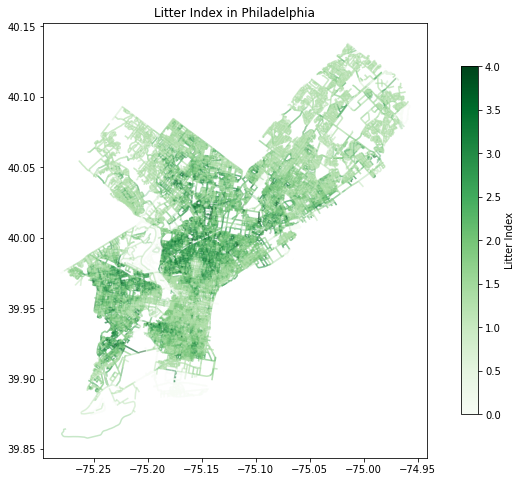

In [11]:
litter_plot = litter_gdf.plot(column='HUNDRED_BLOCK_SCORE', cmap='Greens', figsize=(12, 8), alpha=0.4, legend=True, legend_kwds = {
                        'shrink': 0.8,
                        'label': 'Litter Index'
                      })
plt.title('Litter Index in Philadelphia')
plt.show()

Observation
- The area with high litter index is mainly the central area of Philadelphia. It is also evident that the Western and Northern parts of Philadelphia have a relatively lower litter index score, indicating that these areas are cleaner. Southern tip of Philadelphia is also has relatively low litter index.

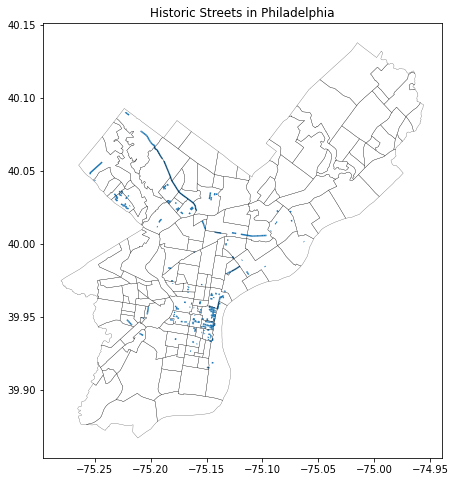

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
historic_streets_plot = historic_streets_gdf.plot( alpha= 1.0,ax=ax)
neighborhood.boundary.plot(color='black', ax=ax, alpha=0.7, linewidth=0.3)
plt.title('Historic Streets in Philadelphia')
plt.show()

Observation:
- According to this map, it is clear that most dense place with the historic streets are located in the neighborhood of Old City.

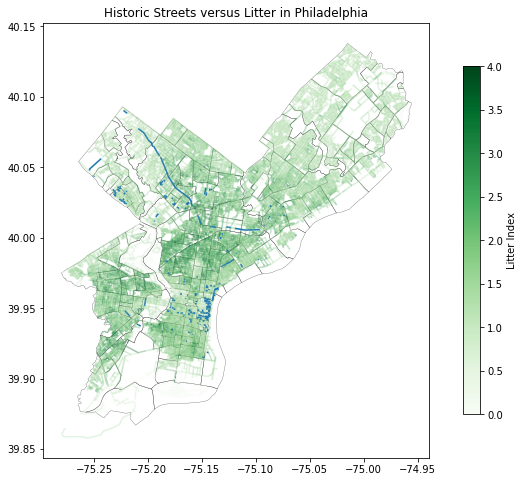

In [13]:
# Plotting the litter data with a color scale legend
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plotting neighborhood boundaries
neighborhood.boundary.plot(color='black', ax=ax, alpha=0.7, linewidth=0.3)

# Plotting litter data
litter_plot = litter_gdf.plot(column='HUNDRED_BLOCK_SCORE', cmap='Greens', alpha=0.2, legend=True, ax=ax, legend_kwds = {
                        'shrink': 0.8,
                        'label': 'Litter Index'
                      })

# Plotting historic street data
historic_streets_plot = historic_streets_gdf.plot(ax=ax, alpha= 1.0)

plt.title('Historic Streets versus Litter in Philadelphia')
plt.show()

Here, the blue points on the plot represent the historic streets in Philadelphia

Observation:
- It is interesting that areas with a lot of historic streets tend to have a somewhat high litter index, but there are also areas with historic streets that have a relatively low litter index. For instance, Germantown Avenue and Roxborough (Northwestern Philadelphia) are covered with lighter shades of green on the map, indicating low litter index. While it is hard to say whether having a historic street in a neighborhood is directly correlated to a cleaner neighborhood, most areas with historic streets are less littered.